# Welcome to the GNN-Playground! 

This interactive notebook lets you explore Graph Neural Networks (GNNs) on tiny, cpu-friendly datasets.

---

**What you can explore:**
1. **Configure** your experiment using interactive widgets. 
2. **Run** the training loop to see live updating loss and accuracy plots. 
3. **Compare** previous and current configurations side-by-side and inspect final metrics.
4. **Generate** your __official__ GNN training certificate, to summarize all your training runs, honoring your final models and experiences you gained! 
5. **Share** your certificates in our Discussion Section on GitHub to get registered on our Playground Leaderboard!

---

Are you ready? Then **Set up your model** and hit `Run All` to get started!

In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))  # Add project root to path for local imports
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.utils import to_networkx
from torch_geometric.loader import DataLoader

from models.net import GNNModel
from utils.train import train_model
from utils.data import load_node_dataset, load_graph_dataset

seed = 42

### DATA

<div class="alert alert-block alert-info">
<b>KarateClub</b> 
Zachary (1977) recorded 34 karate club members social ties as it split due to some dispute. 
The resulting graph has 78 edges denoting friendships and community labels for the members, two groups around Mr. Hi (index 0) and John A (index 33).
KarateClub is an established Benchmark dataset and provides train/test masks for community detection.
</div>

<div class="alert alert-block alert-info">
<b>MUTAG</b> 
Debnath et al. (1977) collected 188 chemicals tested for mutagenicity. Our GNN is supposed to learn the underlying relationship between structure and activity of the compounds. Its a graph-classification benchmark with nodes representing atoms and edges representing chemical bonds.
</div>

<div class="alert alert-block alert-info">
<b>ENZYMES</b>  
Borgwardt et al. (2005) compiled a dataset 600 protein‐structure graphs (each node is substructure like α-Helices and β-Sheets, edges connect spatially adjacent parts). We can class classify the graphs according to 6 <a href="https://en.wikipedia.org/wiki/Enzyme_Commission_number" target="_blank">Enzyme classes</a>. On average each graph has about 32 nodes and 124 edges.  
</div>

Random seed at 42
=== Karate Club Graph ===
Number of nodes: 34
Number of edges: 78
Selected member IDs: [33]


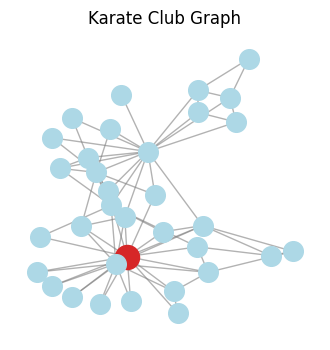

In [ ]:
# Load the Karate Club dataset
# Reference: Wayne W. Zachary (1977), "An Information Flow Model for Conflict and Fission in Small Groups", URL: https://doi.org/10.1086/jar.33.4.3629752
karate = load_node_dataset("KarateClub", seed=seed)
# one-graph DataLoader
karate_loader = DataLoader([karate], batch_size=1, shuffle=False)
G_karate = to_networkx(karate, to_undirected=True)

samples = [33]   # <- Choose members to highlight here

# Display data
print("=== Karate Club Graph ===")
print(f"Number of nodes: {G_karate.number_of_nodes()}")
print(f"Number of edges: {G_karate.number_of_edges()}")
print(f"Selected member IDs: {samples}")

# Viz graph 
plt.figure(figsize=(4, 4))
pos = nx.spring_layout(G_karate, seed=seed)

nx.draw_networkx_nodes(
    G_karate, pos, 
    nodelist=samples,          
    node_color='tab:red', 
    node_size=300
    )
nx.draw_networkx_nodes(
    G_karate, pos, 
    nodelist=[n for n in G_karate.nodes if n not in samples],
    node_color='lightblue',
    node_size=200
    )
nx.draw_networkx_edges(
    G_karate, pos,
    edge_color='gray',
    alpha=0.6
    )
plt.title("Karate Club Graph")
plt.axis('off')
plt.show()

=== Molecule Graph ===
Number nodes: 17
Number edges: 38
Graph label y: 1
Node feature matrix shape: torch.Size([17, 7])
Edge attribute shape: torch.Size([38, 4])
Selected atom IDs: [0]


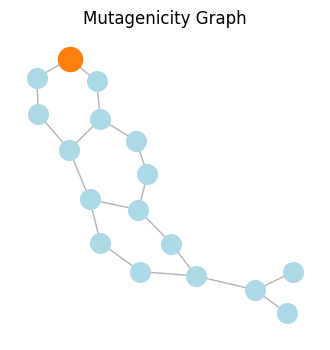

In [ ]:
# Now load the Chemical Mutagenicity dataset
# Reference: Debnath et al. (1991), URL: https://doi.org/10.1021/jm00106a046
mutag_train_loader, mutag_test_loader = load_graph_dataset("MUTAG", batch_size=1, shuffle=False)
mutag_sample = next(iter(mutag_train_loader))
G_mutag = to_networkx(mutag_sample, to_undirected=True)

highlight_atoms = [0]  # <- Choose atoms to highlight here

# Display data
print("=== Molecule Graph ===")
print(f"Number nodes: {mutag_sample.num_nodes}")
print(f"Number edges: {mutag_sample.num_edges}")
print(f"Graph label y: {mutag_sample.y.item()}")
print(f"Node feature matrix shape: {mutag_sample.x.size()}")
print(f"Edge attribute shape: {mutag_sample.edge_attr.size()}")
print(f"Selected atom IDs: {highlight_atoms}")

# Viz graph 
plt.figure(figsize=(4, 4))
pos = nx.spring_layout(G_mutag, seed=seed)
nx.draw_networkx_nodes(
    G_mutag, pos,
    nodelist=highlight_atoms,
    node_color='tab:orange',
    node_size=300
    )
nx.draw_networkx_nodes(
    G_mutag, pos,
    nodelist=[n for n in G_mutag.nodes if n not in highlight_atoms],
    node_color='lightblue',
    node_size=200
    )
nx.draw_networkx_edges(
    G_mutag, pos,
    edge_color='gray',
    alpha=0.6
    )
plt.title("Mutagenicity Graph")
plt.axis('off')
plt.show()

Random seed at 42
=== ENZYMES Graph Sample ===
Number of nodes:            37
Number of edges:            168
Enzyme class label (y):     5  (1–6; Oxidoreductases, Transferases, Hydrolases, Lyases, Isomerases, Ligases)
Binary node features: (1) helix, (2) strand (sheet), (3) coil (loop)
Node-feature matrix shape:  (37, 3)
Highlighted residue IDs:    [0, 5, 20]


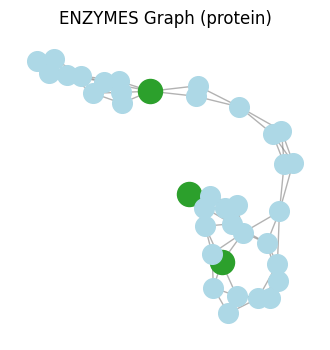

In [ ]:
# Now load the ENZYMES protein-structure dataset
# Reference: Borgwardt et al. (2005), “Protein function prediction via graph kernels”, URL: https://doi.org/10.1093/bioinformatics/bti1007
enz_data = load_graph_dataset("ENZYMES", batch_size=1, shuffle=False, seed=seed)
enz_train_loader, enz_test_loader = enz_data
enz_sample = next(iter(enz_train_loader))
G_enz = to_networkx(enz_sample, to_undirected=True)

highlight_residues = [0, 5, 20]        # <- Choose node IDs to highlight here

# Display basic statistics
enz_num_classes = int(enz_train_loader.dataset.num_classes)
print("=== ENZYMES Graph Sample ===")
print(f"Number of nodes:            {enz_sample.num_nodes}")
print(f"Number of edges:            {enz_sample.num_edges}")
print(f"Enzyme class label (y):     {enz_sample.y.item()}  (1–{enz_num_classes}; Oxidoreductases, Transferases, Hydrolases, Lyases, Isomerases, Ligases)")
print(f"Binary node features: (1) helix, (2) strand (sheet), (3) coil (loop)")
print(f"Node-feature matrix shape:  {tuple(enz_sample.x.size())}")
if enz_sample.edge_attr is not None:
    print(f"Edge attribute matrix shape: {tuple(enz_sample.edge_attr.size())}")
print(f"Highlighted residue IDs:    {highlight_residues}")

# Viz graph
plt.figure(figsize=(4, 4))
pos = nx.spring_layout(G_enz, seed=seed)

nx.draw_networkx_nodes(
    G_enz, pos,
    nodelist=highlight_residues,
    node_color='tab:green',
    node_size=300
)
nx.draw_networkx_nodes(
    G_enz, pos,
    nodelist=[n for n in G_enz.nodes if n not in highlight_residues],
    node_color='lightblue',
    node_size=200
)
nx.draw_networkx_edges(
    G_enz, pos,
    edge_color='gray',
    alpha=0.6
)
plt.title("ENZYMES protein Graph")
plt.axis('off')
plt.show()

### TRAINING EXAMPLE

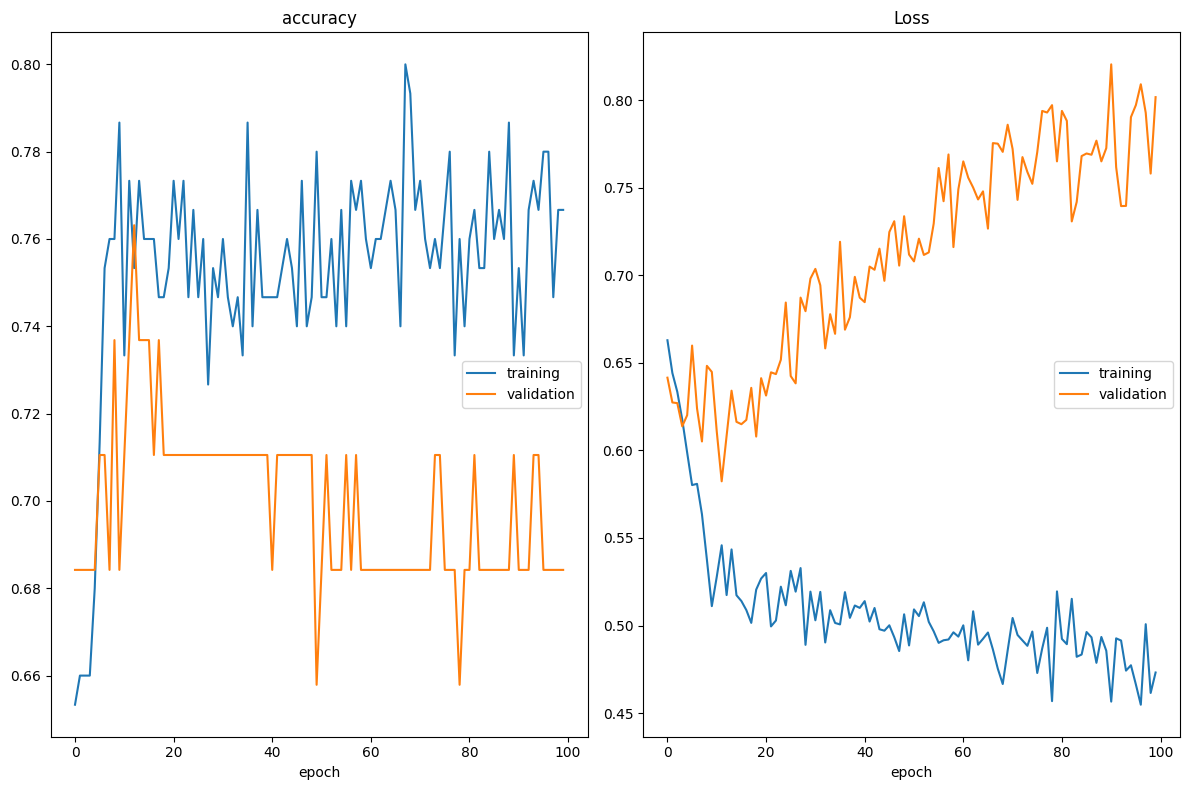

Epoch 101/100, Loss: 0.4732, Accuracy: 0.7667, Val Loss: 0.8017, Val Accuracy: 0.6842


In [5]:
mutag_model = GNNModel(
    in_dim=mutag_sample.x.size(1),
    out_dim=int(mutag_sample.y.numel()), # number of classes
    hidden_dim=128,
    num_layers=3,
    layer_type="GCN",
    dropout_value=0.5,
    glob_pooler="mean",
    task="graph",
)

history_mutag = train_model(
    model=mutag_model,
    train_loader=mutag_train_loader,
    val_loader=mutag_test_loader,
    )


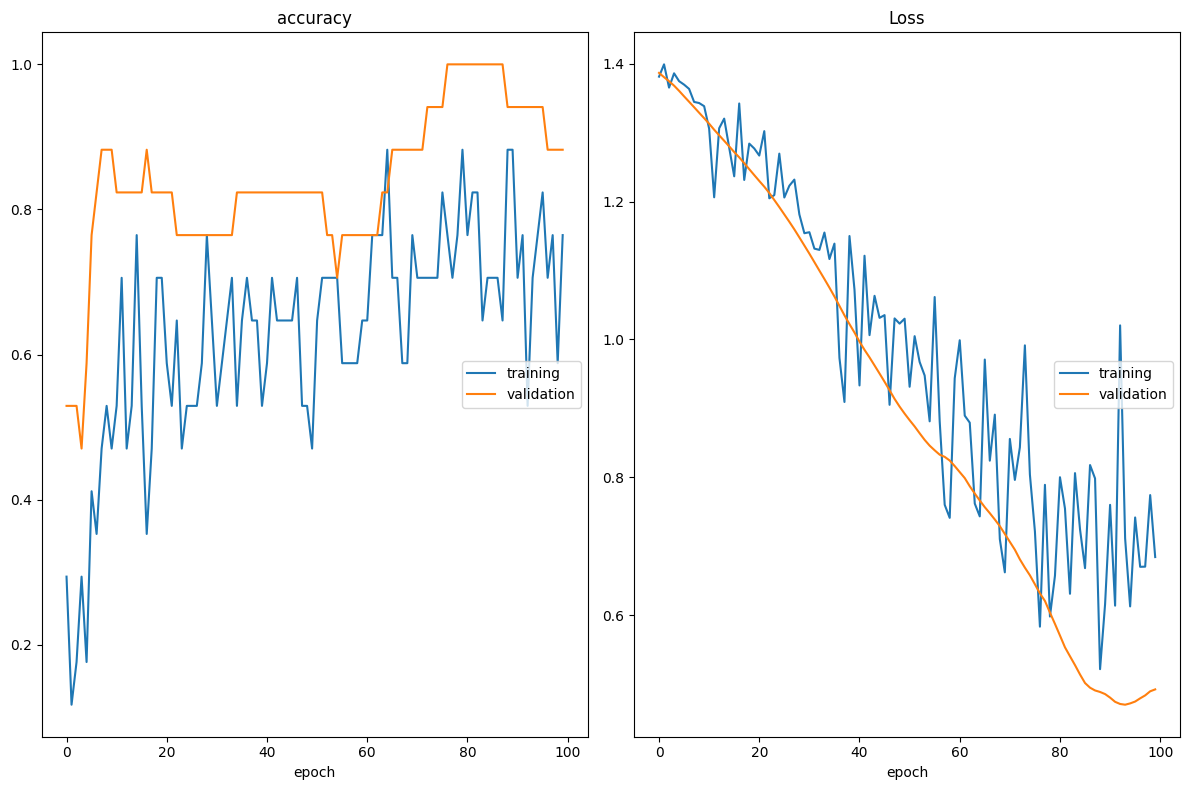

Epoch 101/100, Loss: 0.6846, Accuracy: 0.7647, Val Loss: 0.4928, Val Accuracy: 0.8824


In [6]:
karate_model = GNNModel(
    in_dim=karate.num_node_features,    # 32 one-hots
    hidden_dim=128,
    out_dim=int(karate.y.max().item()) + 1,  # number of classes
    num_layers=3,
    layer_type="GAT",
    dropout_value=0.5,
    glob_pooler="mean",
    task="node",
)

history_karate = train_model(
    model=karate_model,
    train_loader=karate_loader, 
    val_loader=karate_loader,   # same graph, metrics split by node-masks
)

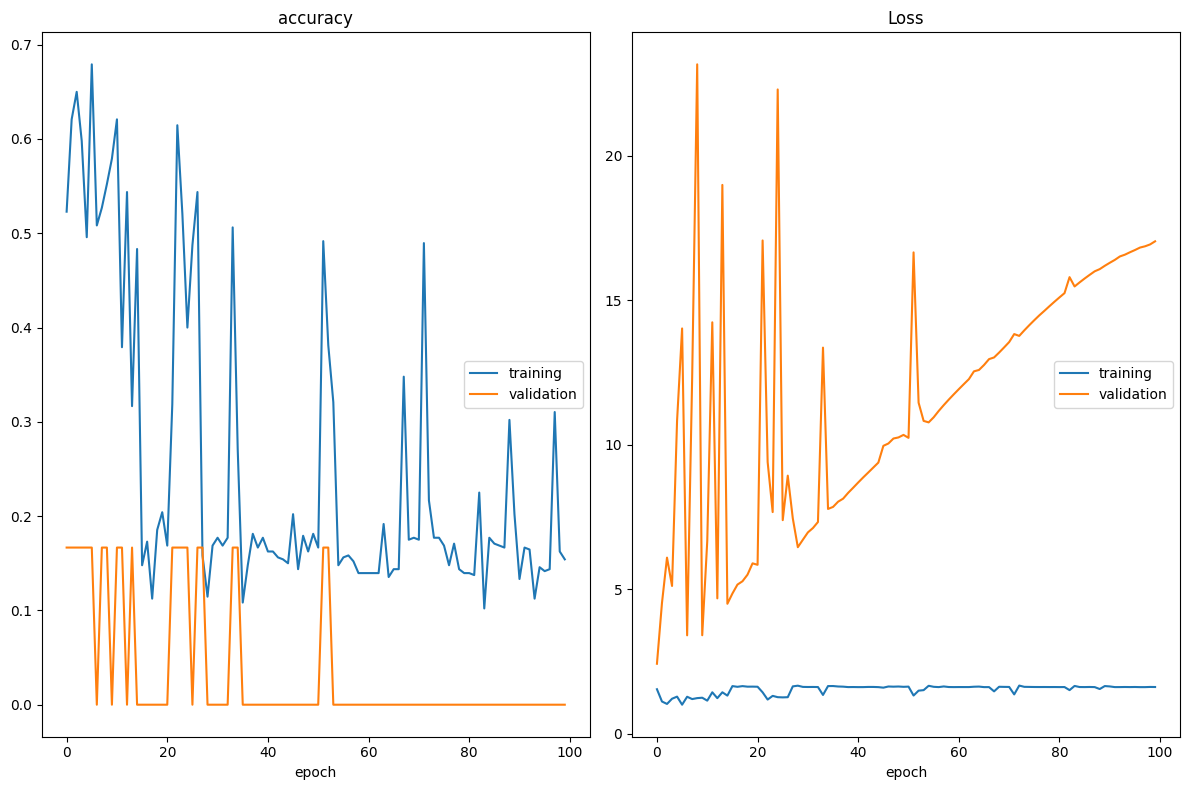

Epoch 101/100, Loss: 1.6207, Accuracy: 0.1542, Val Loss: 17.0452, Val Accuracy: 0.0000


In [7]:
enz_model = GNNModel(
    in_dim=enz_sample.x.size(1),
    out_dim=enz_num_classes, # number of classes
    hidden_dim=128,
    num_layers=3,
    layer_type="GCN",
    dropout_value=0.5,
    glob_pooler="mean",
    task="graph",
)

history_enz = train_model(
    model=enz_model,
    train_loader=enz_train_loader,
    val_loader=enz_test_loader,
    )

### Config 

In [8]:
from utils.config import load_config

In [9]:
# 1) Load and inspect the configurations

config = load_config("../configs/new_experiment2.yaml")
# Display config summary
print(f"""\
=== Config Summary ===
Dataset:   {config["data"]["name"]}, {config["data"]["task"]}-level
Model:     {config['model']['layer_type']} x {config['model']['num_layers']}, {config['model']['hidden_dim']} hidden dim, {config['model']['glob_pooler']} pooling
Optimizer: {config['optimizer']['type']} at lr={config['optimizer']['lr']}, weight decay={config['optimizer']['weight_decay']}
Training:  {config['training']['epochs']} epochs, batch size={config['training']['batch_size']}, validation split={config['training']['val_split']}
Seed:      {config['data']['random_seed']}
""")

=== Config Summary ===
Dataset:   ENZYMES, graph-level
Model:     GIN x 5, 128 hidden dim, mean pooling
Optimizer: Adam at lr=0.002, weight decay=1e-05
Training:  300 epochs, batch size=64, validation split=0.1
Seed:      42



In [10]:
# 2) Instantialte loaders 

if config["data"]["task"] == "node":
    data = load_node_dataset(
        name=config["data"]["name"],
        seed=config["data"]["random_seed"],
        root="data/"
    )
    train_loader = DataLoader([data], batch_size=config["training"]["batch_size"], shuffle=False)
    val_loader = DataLoader([data], batch_size=config["training"]["batch_size"], shuffle=False) # same graph, metrics split by node-masks
else: # graph-level task
    train_loader, val_loader = load_graph_dataset(
        name=config["data"]["name"],
        root="data/",
        split_ratio=config["training"]["val_split"],
        batch_size=config["training"]["batch_size"],
        shuffle=False,
        seed=config["data"]["random_seed"]
    )

# 3) Check they are complete
print(f"TAsk: {config['data']['task']}")
print(f"Train_loader: {len(train_loader)} batches")
print(f"Val_loader: {len(val_loader)} batches")

Random seed at 42
TAsk: graph
Train_loader: 1 batches
Val_loader: 9 batches


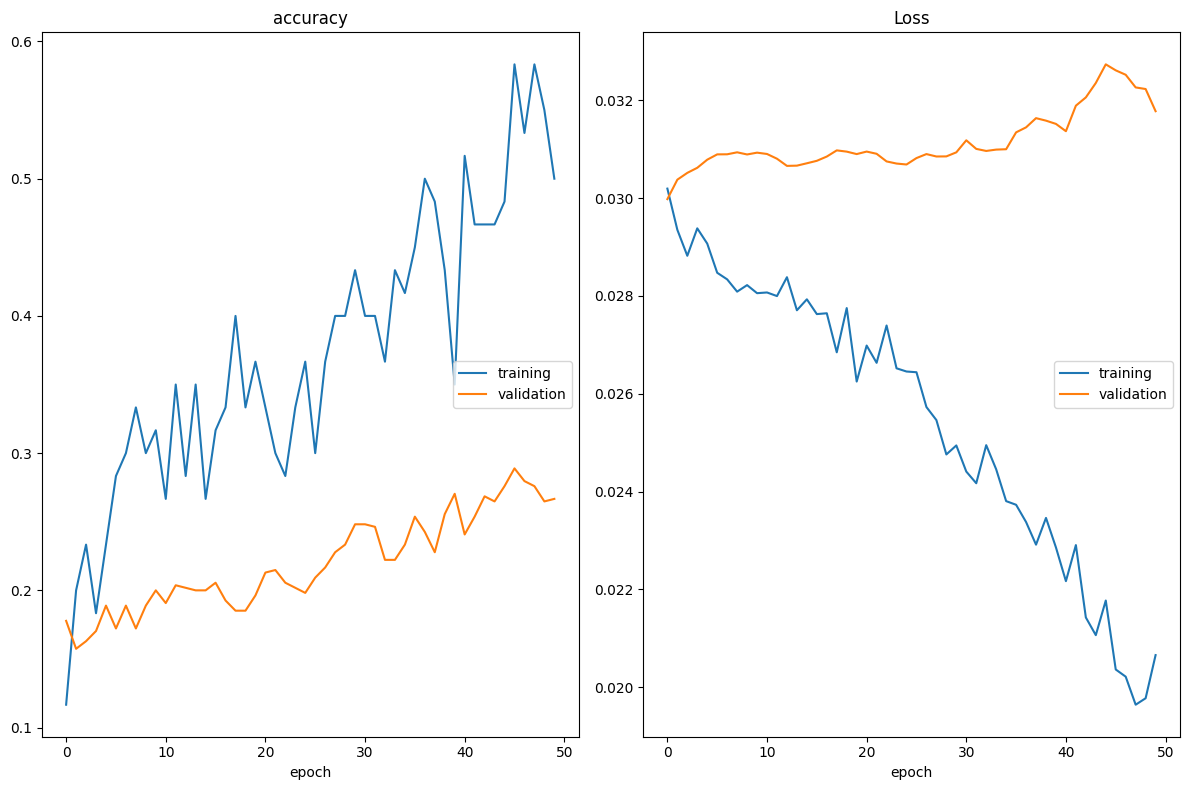

Epoch 051/50, Loss: 0.0207, Accuracy: 0.5000, Val Loss: 0.0318, Val Accuracy: 0.2667


<Figure size 640x480 with 0 Axes>

In [15]:
# CLI access to launce the training         
%matplotlib inline
%run -i ../gnn_competition.py 
# optionally you can specify --config ../configs/new_experiment2.yaml